# Kent Seslerinin Sınıflandırılması

## Bölüm 1: Ses Verilerinden Spektrogramlara Dönüşüm ve Spektrogram Ön İşleme 

In [1]:
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive")

## 0. Veri Setinin İncelenmesi

a. “UrbanSounds8K” veri setini bilgisayarınıza indirin. (5,6 GB)
https://urbansounddataset.weebly.com/urbansound8k.html

b. İndirdiğiniz .tar dosyasını açın. (Mentorlarınızdan destek alabilirsiniz )

c. README dosyasını okuyarak elimizdeki verinin ne olduğunu ve nasıl
isimlendirildiğini iyice anlayın.

Değerlendirme sadece “Önişleme” ve “Model Hazırlanması ve Eğitilmesi” notebookları üzerinden olacaktır! Sizden 2 farklı notebook beklenmektedir. Spectrogram oluşturma kısmını isteyen arkadaşlarım yapmayarak, hazırlanmış spectrogramları aşağıdaki linkten indirerek çalışmalarına bunun üzerinden devam edebilirler.

Spectrograms:https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing

In [ ]:
!tar -xvf UrbanSound8K.tar.gz

In [ ]:
os.mkdir("/content/drive/My Drive/voiceimages")
for etiket in range(10):
  os.mkdir("/content/drive/My Drive/voiceimages"+"/"+str(etiket))

In [8]:
!ls

'Colab Notebooks'
 coursera
 coursera_deep_learning
 eternal-opt-sound_classification_project.ipynb
 f3239-NASA-sat-raw
 on_islenmis_ses_goruntuleriyle_cnn_modeli.ipynb
 raster
 sat-imagery
 ses_verilerinden_spektrograma_donusum_ve_on_isleme.ipynb
 spectrograms
 UrbanSound8K
 UrbanSound8K.tar.gz
 voiceimages


In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
import matplotlib.pyplot as plt

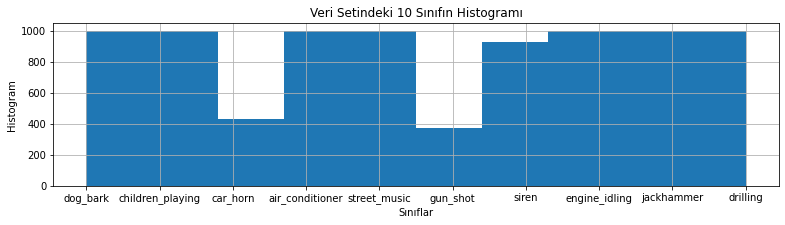

In [8]:
plt.figure(figsize=(13,3))
plt.title("Veri Setindeki 10 Sınıfın Histogramı")
plt.xlabel("Sınıflar")
plt.ylabel("Histogram")
data["class"].hist()
plt.show()

### Sınıflandırma problemlerinde verinin en ideal hali, histogramın düz olduğu haldir. Ancak birçok zaman böyle bir durum olmaz.


## Ses Verilerinin Spektrum Resimlerinin Elde Edilmesi

In [ ]:
import librosa
import librosa.display

In [9]:
import numpy as np

In [ ]:
def create_spectrogram(y):
  spec= librosa.feature.melspectrogram(y=y)
  spec_conv=librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv

In [ ]:
ses, sr = librosa.load("/content/drive/My Drive/UrbanSound8K/audio/fold2/4201-3-0-0.wav")
ses=create_spectrogram(ses)
librosa.display.specshow(ses, sr= sr)
plt.savefig("/content/drive/My Drive/resim4.png", pad_inches = 0, bbox_inches = 'tight')
plt.close()

ornek_resim= plt.imread("/content/drive/My Drive/resim4.png")
plt.title("4201-3-0-0.wav Ses Dosyasının Spektrogramı")
plt.imshow(ornek_resim)
plt.show()

In [ ]:
for fold in range(1,11):
  fold_iter="/content/drive/My Drive/UrbanSound8K/audio/fold"+str(fold)

  for ses_dosyasi in os.listdir(fold_iter):
    if ses_dosyasi.endswith(".wav"):
        ses_isim=ses_dosyasi.split(".")[0]
        
        ses_etiket=ses_dosyasi.split("-")[1]

        audio, sr = librosa.load(fold_iter + "/" + ses_dosyasi)
        spec=create_spectrogram(audio)
        librosa.display.specshow(spec, sr= sr)
        plt.savefig("/content/drive/My Drive/voiceimages/"+ses_etiket+"/"+ses_isim+".png", pad_inches = 0, bbox_inches = 'tight')
        plt.close()

### Niyetimiz tüm fold'ları gezip tüm sesleri resme dönüştürüp etiketlerine göre "voiceimages" klasöründeki etiket(0, 1, 2..., 9) klasörlerine göndermekti. Tüm fold'lar için bir üstteki kodu çalıştırdık ancak belli bir fold'tan sonra GPU yeterli gelmedi. Dolayısıyla sekiz bin küsür veri yerine beş bin küsür veri elde edebildik. Bu yüzden oluşturduğumuz "voiceimages" klasörü yerine proje dökümanında paylaşılan "spectrograms" klasörünü eğitim için kullanacağız.

In [14]:
cpt1 = sum([len(files) for r, d, files in os.walk("/content/drive/My Drive/voiceimages")])
cpt2 = sum([len(files) for r, d, files in os.walk("/content/drive/My Drive/spectrograms")])
print("'voiceimages' Klasörü İçerisindeki Toplam Dosya Sayısı: ",cpt1)
print("'spectrograms' Klasörü İçerisindeki Toplam Dosya Sayısı: ",cpt2)

'voiceimages' Klasörü İçerisindeki Toplam Dosya Sayısı:  5071
'spectrograms' Klasörü İçerisindeki Toplam Dosya Sayısı:  8732


## 2. Önişleme - Notebook
a. Görüntüleri (spectrogramları) sırasıyla okuyarak, grayscale dönüşümü, resizing ve normalizasyon yapın.

b. Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir listeye ekleyin.

c. Bu listeyi kullanarak, X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini oluşturun.

d. Bu veri setlerini bilgisayarınıza kaydedin.


In [10]:
import cv2

If you are enlarging the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are shrinking the image, you should prefer to use INTER_AREA interpolation.

Link: https://stackoverflow.com/questions/23853632/which-kind-of-interpolation-best-for-resizing-image

In [11]:
import random

In [12]:
imgs= []
labels= []

In [13]:
for etiket in range(10):
  img_array=os.listdir("/content/drive/My Drive/spectrograms/"+str(etiket))  

  for img_iter in range(len(img_array)):
    gray_img=cv2.imread("/content/drive/My Drive/spectrograms/"+str(etiket)+"/"+img_array[img_iter],0)

    gray_r_img = cv2.resize(gray_img, (100, 100), interpolation = cv2.INTER_AREA)

    gray_n_img=gray_r_img/255
    
    imgs.append(gray_n_img)
    labels.append(etiket)

dict_ = list(zip(imgs, labels))
random.seed(42)
random.shuffle(dict_)
imgs, labels = zip(*dict_)

imgs=np.array(imgs)
labels=np.array(labels)

In [14]:
print(imgs.shape)

(8732, 100, 100)


In [15]:
wrapped_data=imgs.reshape(len(imgs),-1)
print(wrapped_data.shape)

(8732, 10000)


In [16]:
print(labels.shape)

(8732,)


In [19]:
np.savetxt('images.txt', wrapped_data)

In [ ]:
np.savetxt('labels.txt', labels)